## 导入必要的模块

In [1]:
# coding:gbk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
dataDir = r'P:/files/data/Kesci/competition'
os.chdir(dataDir)

## 用户兴趣标签数据的清洗

In [25]:
#uil = pd.read_csv("userinterestlabel/userinterestlabel.csv")
with open('usertimespacedata/shujudasai_1.csv') as uil:#input file
    with open('usertimespacedata/shujudasai_1_utf8.csv','a+') as f:# output file
        try:
            while True:
                p=uil.next().decode("GB2312")
                f.write(p)
        except StopIteration:
            pass
    
    

## 修改文件表头，避免编码问题

In [110]:
f=open('userinterestlabel/uil_utf8.csv','r')
fields=f.next().split(",")
eng_Fields=['imei','mbi','carapp','moneyapp',
            'stockapp','friends','interprov',
            'abroad','shopsite','ITsite',
            'foodsite','estatesite','healthsite',
           'finacialsite','travelsite','sportsite',
            'carsite','newssite','societysite',
            'entertainsite','wantedsite','edusite',
            'othersite','gamesite']
f_dic={}
for index,g in enumerate(fields):
    f_dic[eng_Fields[index]]=g
uil=pd.DataFrame(columns=eng_Fields)
for i in xrange(10000):
    line = f.next().rstrip('\n')
    line=line.replace('\"','')
    uil.loc[i]=line.split(",")
uil.describe()
uil=uil.replace("是",'1')
uil=uil.replace("否",'0')
uil[eng_Fields[1:]]=uil[eng_Fields[1:]].astype(np.int32)

In [111]:
uil.head()

,imei,mbi,carapp,moneyapp,stockapp,friends,interprov,abroad,shopsite,ITsite,...,travelsite,sportsite,carsite,newssite,societysite,entertainsite,wantedsite,edusite,othersite,gamesite
0,2ab41bf4da442c8b2f3306c28d15d919,0,0,0,0,180,1,0,4,9,...,0,0,0,3,0,0,0,0,0,0
1,d2aa3932a2e30174c48db0903c5d6be7,2,0,0,0,138,1,1,17,548,...,0,0,0,29,11,1,0,14,0,23
2,2d2ffd78336770d589a239943a3b8491,0,0,0,889,3,0,0,3288,1220,...,5,0,0,210,103,25,0,1,0,131
3,181271cc81d8e27efcf88dd8a67233b6,0,0,0,0,23,0,0,692,294,...,0,0,0,8,0,19,0,0,0,70
4,1e1528b7c57a948b0c3bd05eec973478,0,0,0,0,21,1,0,7192,334,...,0,0,0,102,0,0,0,0,0,548


In [123]:
%matplotlib inline
uil_imei=uil.groupby(['imei'])
uil_imei.head()
mbi=pd.Series(uil['mbi'])
mbi.max()

364

## 用户时空数据清洗

In [63]:
import folium
map_osm = folium.Map(location=[31.34085001, 121.2839])

spt=open("usertimespacedata/shujudasai_1_0.csv",'r')
try:
    count=0
    while count<10:
        traj=spt.next().rstrip('\n').split(",")
        lngs=range(2,len(traj),2)
        lats=map(lambda x:x+1,lngs)
        lng,lat=[traj[i] for i in lngs],[traj[j] for j in lats]
        points=[[float(lat[i]),float(lng[i])] for i in xrange(len(lng)) if lng[i] is not '']
        for p in points:
            folium.Marker(p).add_to(map_osm)
        count += 1
except StopIteration:
    pass
map_osm

ValueError: invalid literal for float(): 31.34085001.1

In [85]:
import folium
map_osm = folium.Map(location=[31.34085001, 121.2839])
folium.Marker([31.34085001, 121.2839]).add_to(map_osm)

## Chunk数据 基本统计分析
+ 极大值、极小值
+ 成对相关性pearson法检验

In [86]:
os.chdir(r"P:\files\data\Kesci\competition\userinterestlabel")
# os.listdir(os.getcwd())
uil=pd.read_csv("shujudasai2_0.csv")
uilmax=uil.max()
uilmin=uil.min()
corrs=uil.corr()
print '汽车类APP：汽车类网站',corrs['carapp'].loc['carsite']
print '理财类APP：股票类APP',corrs['moneyapp'].loc['stockapp']
print '理财类APP：金融类网站',corrs['moneyapp'].loc['finacialsite']

汽车类APP：汽车类网站 0.124588165956
理财类APP：股票类APP 0.000528206165221
理财类APP：金融类网站 2.68657960883e-05


In [87]:
uil.head(n=12)

,imei,mbi,carapp,moneyapp,stockapp,friends,interprov,abroad,shopsite,ITsite,...,travelsite,sportsite,carsite,newssite,societysite,entertainsite,wantedsite,edusite,othersite,gamesite
0,2ab41bf4da442c8b2f3306c28d15d919,0,0,0,0,180,1,1,4,9.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,d2aa3932a2e30174c48db0903c5d6be7,2,0,0,0,138,1,1,17,548.0,...,0.0,0.0,0.0,29.0,11.0,1.0,0.0,14.0,0.0,23.0
2,2d2ffd78336770d589a239943a3b8491,0,0,0,889,3,1,1,3288,1220.0,...,5.0,0.0,0.0,210.0,103.0,25.0,0.0,1.0,0.0,131.0
3,181271cc81d8e27efcf88dd8a67233b6,0,0,0,0,23,1,1,692,294.0,...,0.0,0.0,0.0,8.0,0.0,19.0,0.0,0.0,0.0,70.0
4,1e1528b7c57a948b0c3bd05eec973478,0,0,0,0,21,1,1,7192,334.0,...,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,548.0
5,0819c551679a892e62a3b676063464a4,0,0,0,0,62,1,1,199,1559.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,5.0
6,5a2ba95a9c4540a79887f0e7b2c843f4,6,0,0,0,47,1,1,62,107.0,...,65.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
7,a012d1114e7192f02c469290751dfca5,0,0,0,0,14,1,1,893,858.0,...,0.0,0.0,0.0,141.0,0.0,363.0,0.0,115.0,0.0,125.0
8,72d894096a281222f728f2b62f46393d,0,0,0,0,29,1,1,210,394.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,20.0
9,69f75727d326b51809276b38b5e6cc15,0,0,0,191,38,1,1,129,72.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,4.0


In [88]:
import matplotlib.pyplot as plt
for i in xrange(uil.shape[1]):
    print 'max',uil.columns[i],uil.iloc[:,i].max()

max imei fffffdb5cba9d3c7b220aec3f65bb1dc
max mbi 1350
max carapp 861
max moneyapp 38
max stockapp 36954
max friends 1622
max interprov 1
max abroad 1
max shopsite 629165
max ITsite 273435.0
max foodsite 4215.0
max estatesite 43870.0
max healthsite 6560.0
max finacialsite 183902.0
max travelsite 20556.0
max sportsite 62355.0
max carsite 47678.0
max newssite 37499.0
max societysite 8896.0
max entertainsite 10186.0
max wantedsite 8599.0
max edusite 183722.0
max othersite 0.0
max gamesite 133300.0


In [97]:
columns = uil.columns[1:]
uri_normal = uil
for column in columns:
    uri_normal[column] = uri_normal[column]/uri_normal[column].sum()
    

,imei,mbi,carapp,moneyapp,stockapp,friends,interprov,abroad,shopsite,ITsite,...,travelsite,sportsite,carsite,newssite,societysite,entertainsite,wantedsite,edusite,othersite,gamesite
0,2ab41bf4da442c8b2f3306c28d15d919,0.000000,0.0,0.0,0.000000,5.315382e-05,0.00001,0.00001,4.657605e-08,1.279301e-07,...,0.000000,0.0,0.0,3.465356e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN,0.000000e+00
1,d2aa3932a2e30174c48db0903c5d6be7,0.000010,0.0,0.0,0.000000,4.075126e-05,0.00001,0.00001,1.979482e-07,7.789523e-06,...,0.000000,0.0,0.0,3.349844e-06,8.532999e-06,9.244502e-07,0.0,4.410996e-06,NaN,2.878639e-06
2,2d2ffd78336770d589a239943a3b8491,0.000000,0.0,0.0,0.000263,8.858971e-07,0.00001,0.00001,3.828551e-05,1.734164e-05,...,0.000002,0.0,0.0,2.425749e-05,7.989990e-05,2.311126e-05,0.0,3.150712e-07,NaN,1.639573e-05
3,181271cc81d8e27efcf88dd8a67233b6,0.000000,0.0,0.0,0.000000,6.791877e-06,0.00001,0.00001,8.057656e-06,4.179051e-06,...,0.000000,0.0,0.0,9.240950e-07,0.000000e+00,1.756455e-05,0.0,0.000000e+00,NaN,8.761076e-06
4,1e1528b7c57a948b0c3bd05eec973478,0.000000,0.0,0.0,0.000000,6.201279e-06,0.00001,0.00001,8.374374e-05,4.747629e-06,...,0.000000,0.0,0.0,1.178221e-05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN,6.858671e-05
5,0819c551679a892e62a3b676063464a4,0.000000,0.0,0.0,0.000000,1.830854e-05,0.00001,0.00001,2.317158e-06,2.216034e-05,...,0.000000,0.0,0.0,2.310237e-06,0.000000e+00,0.000000e+00,0.0,3.150712e-07,NaN,6.257912e-07
6,5a2ba95a9c4540a79887f0e7b2c843f4,0.000029,0.0,0.0,0.000000,1.387905e-05,0.00001,0.00001,7.219288e-07,1.520947e-06,...,0.000021,0.0,0.0,0.000000e+00,7.757272e-07,0.000000e+00,0.0,0.000000e+00,NaN,2.503165e-07
7,a012d1114e7192f02c469290751dfca5,0.000000,0.0,0.0,0.000000,4.134186e-06,0.00001,0.00001,1.039810e-05,1.219600e-05,...,0.000000,0.0,0.0,1.628717e-05,0.000000e+00,3.355754e-04,0.0,3.623319e-05,NaN,1.564478e-05
8,72d894096a281222f728f2b62f46393d,0.000000,0.0,0.0,0.000000,8.563671e-06,0.00001,0.00001,2.445243e-06,5.600496e-06,...,0.000000,0.0,0.0,0.000000e+00,3.102909e-06,0.000000e+00,0.0,0.000000e+00,NaN,2.503165e-06
9,69f75727d326b51809276b38b5e6cc15,0.000000,0.0,0.0,0.000056,1.122136e-05,0.00001,0.00001,1.502078e-06,1.023441e-06,...,0.000000,0.0,0.0,2.656773e-06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN,5.006329e-07


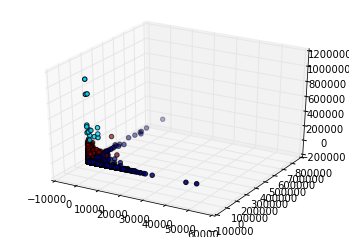

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=uri_normal['friends']*100000000
y=uri_normal['shopsite']*100000000
z=uri_normal['stockapp']*100000000
q=uri_normal['mbi']*100000000
testset = np.array(map(lambda a,b,c,d:np.array([a,b,c,d]), x, y, z,q))
t = KMeans(n_clusters=4, random_state=170).fit_predict(testset)
ax.scatter(x,y,z,c=t,marker='o')
plt.show()

[[ 8.63926711  5.08322234]
 [-8.75665395  4.03833585]
 [ 0.67778343  8.51397085]
 [-9.36653134  2.24030024]
 [ 2.12015254  5.61101265]
 [ 5.85057261  4.21082971]
 [ 4.63185794  6.93103747]
 [ 2.26571286  8.36068903]
 [-9.30430569  4.61896791]
 [ 2.70208537  6.97579352]]


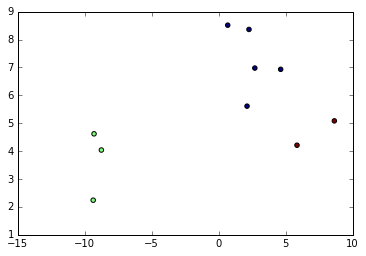

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
p,t=make_blobs(n_samples=10,cluster_std=[1.0, 2.5, 0.5],random_state=20)
print p
y = KMeans(n_clusters=3, random_state=random_state).fit_predict(p)
plt.scatter(p[:,0],p[:,1],c=y)
plt.show()

## 处理时空数据

In [44]:
import geojson
for k in xrange(58):
    dir = r'P:\files\data\Kesci\competition\usertimespacedata\shujudasai_1_{0}.csv'.format(k)
    outdir = r'P:\files\data\Kesci\competition\usertimespacedata\shujudasai_1_{0}.json'.format(k)
    with open(dir,'r') as sp:
        with open(outdir,'w+') as outsp:
            for s in sp:
                p = s.rstrip('\n').split(',')
                date, imei = p[0:2]
                points = []
                for i,j in enumerate(p):
                    if i%2==0 and i >0:
                        try:
                            points.append([float(p[i]),float(p[i+1])])
                        except:
                            pass

                multip = {"type":"MultiPoint",
                         "coordinates":points,
                         "properties":{"date":date,"imei":imei}}
                outsp.write(str(multip).replace('\'','\"')+'\n')
            


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [43]:
f=open(outdir,'r')
t=geojson.loads(f.next().rstrip('\n'))
print t['properties']['date']
print t.coordinates
f.close()

IOError: [Errno 2] No such file or directory: 'P:\\files\\data\\Kesci\\competition\\usertimespacedata\\shujudasai_1_4.json'

In [ ]:
os.chdir(r"P:\files\data\Kesci\competition\usertimespacedata")